# Module 4 Assignment: Analyzing Car CO₂ Emissions

Welcome to this module's assignment!

Carefully read each Markdown (text) cell, which includes instructions and hints. Start by reading the background behind your upcoming tasks.

When you are done, submit your solution by saving it, then clicking on the blue submit button at the top of the page.

## Background:
You work for a government agency that needs to renew its vehicle fleet. To be compliant, the agency needs to hit a specific carbon target. Your task is to analyze the emissions data of various car models to ensure compliance with environmental regulations. Your insights will help guide the selection of the most suitable, greener vehicles.

You will be working with data compiled from the Government of Canada official site, which contains vehicle specifications, fuel consumption data, and CO₂ emissions information of cars. You will be working with the following features:

- `Vehicle Class`: Class of vehicle depending on their utility, capacity, and weight.
- `Engine Size`: Size of the engine used in liters.
- `Fuel Type`: Type of fuel used (X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = Natural gas).
- `City`: Fuel consumption on city roads (L/100 km).
- `Highway`: Fuel consumption on highways (L/100 km).
- `Combined`: The combined fuel consumption (55% city, 45% highway) shown in L/100 km.
- `Combined (mpg)`: The combined fuel consumption in both city and highway shown in miles per gallon (mpg).
- `CO₂ Emissions`: The tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving.


## Table of Contents
- [Step 1: Importing libraries](#step-1)
- [Step 2: Load the data](#step-2)
- [Step 3: CO₂ emissions](#step-3)
    - [CO₂ emissions distribution](#CO₂-distribution)
    - [Mean CO₂ emissions](#mean-CO₂-emissions)
    - [Compact vs. Mid-size cars](#compact-vs-mid-size-cars)
        - [Exercise 1: Hypothesis testing](#ex1)
- [Step 4: Modelling the CO₂ emissions (1 variable)](#step-4)
    - [Dependent and independent features](#dependent-and-independent-features)
        - [Exercise 2: Pairplot](#ex2)
        - [Exercise 3: Correlation matrix](#ex3)
    - [Fitting a Simple Linear Regression](#fitting-a-simple-linear-regression)
        - [Exercise 4: Simple Linear Regression](#ex4)
- [Step 5: Modelling the CO₂ emissions (multiple variables)](#step-5)
    - [Categorical variables](#categorical-variables)
        - [Exercise 5: Encoding categorical variables](#ex6)
    - [Training the model](#training-the-model)
        - [Exercise 6: Create and fit a multiple linear regression](#ex6)
- [Step 6: Predicting CO₂ emissions for new car models](#step-6)

<a id="step-1"></a>

## Step 1: Importing libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

<a id="step-2"></a>

## Step 2: Load the data


In [2]:
# Load the data
df = pd.read_csv("data/co2_emissions.csv")
df.head()

,Model year,Make,Model,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,City,Highway,Combined,Combined (mpg),CO2 emissions
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199
1,2020,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254
2,2020,Acura,MDX SH-AWD A-SPEC,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258
3,2020,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
4,2020,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261


<a id="step-3"></a>

## Step 3: Mean CO₂ emissions 
To understand car emissions better, you first want a clear picture of the average CO₂ emissions. Then you will use a hypothesis test to see whether this mean differs between different groups of cars.

<a id="CO₂-distribution"></a>

### CO₂ distribution
Start by visualizing the distribution of the CO₂ emissions using a histogram. What does the distribution look like? Does it resemble any of the known ones? **Run the next cell to find out!** 

Text(0.5, 1.0, 'Distribution for CO₂ emissions')

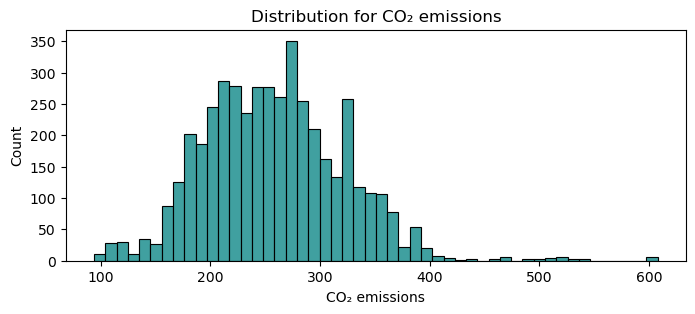

In [3]:
plt.figure(figsize=(8,3))
sns.histplot(df, x="CO2 emissions", color="teal")
plt.xlabel("CO₂ emissions")
plt.title("Distribution for CO₂ emissions")

<a id="compact-vs-mid-size-cars"></a>

### Compact vs. Mid-size cars

<a id="ex1"></a>

#### Exercise 1: Hypothesis Testing

When deciding which vehicle class better fits the necessities of the agency, compact and mid-size cars are among the top contenders due to their balance of size and efficiency. Conduct a hypothesis test at the 5% significance level to see if the mean CO₂ emissions of compact cars differ from those of mid-size cars.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Create a new dataframe <code>compact</code> by filtering the original dataframe to contain ony the compact cars.</li>
            <li>Create a new dataframe <code>mid_size</code> by filtering the original dataframe to contain ony the mid-size cars.</li>
            <li>Get the test statistic and p-value for the test. 
            <ul>
                <li>Since you don't know the population standard deviation, use a t-test.</li>
                <li>Is this a one-sided or two-sided test? </li>
                <li>Does it correspond to a one sample or two sample test?</li>
            </ul>
            <li> <strong>Reflect:</strong> What can you conclude from the test with a 5% significance level?</li>
        </ol>
</div>


In [4]:
# GRADED CELL: exercise 1

### START CODE HERE ###

# get all compact cars
df_compact = df[df["Vehicle class"]=="Compact"]

# get all mid-size cars
df_mid_size = df[df["Vehicle class"]=="Mid-size"]

# find the t-statistic and p-value
test_results = stats.ttest_ind(df_compact["CO2 emissions"], df_mid_size["CO2 emissions"],
                              equal_var = False, alternative="two-sided")

### END CODE HERE ###

# Extract the t-statistic and p-value from the results
tstat = test_results[0]
pval = test_results[1]

In [5]:
# This cell is locked. You will not be able to edit it.

# print the results
print("The p-value is", pval, ", with a t-statistic of",round(tstat, 4))   

The p-value is 4.01440867666918e-05 , with a t-statistic of -4.127


What’s your conclusion? Should mid-sized cars remain under consideration?

<a id="step-4"></a>

## Step 4: Modelling the CO₂ emissions (1 variable)

To select the best car (perhaps one that is not on your list) with the least environmental impact, you decide to use a linear regression to predict CO₂ emissions. You start using a single variable as a predictor. This model can help you understand how changes in the selected feature affect emissions.


<a id="dependent-and-independent-features"></a>

### Dependent and independent variables

The first step is to identify your dependent variable and your independent ones.

<a id="ex2"></a>

#### Exercise 2: Pairplot

The big question you need to answer is which variables best explain the dependent variable. That way you can select the best variable to use for your regression model. Since you'll be using a linear regression model, examining the correlation between variables is a great place to start.

Create a pairplot to analyze the pairwise relations between variables.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Create a list with all numerical independent variables and the dependent variable.</li>
            <li>Visualize the scatter plots between pairs of numerical features.</li>
        </ol>
</div>

<Figure size 640x480 with 0 Axes>

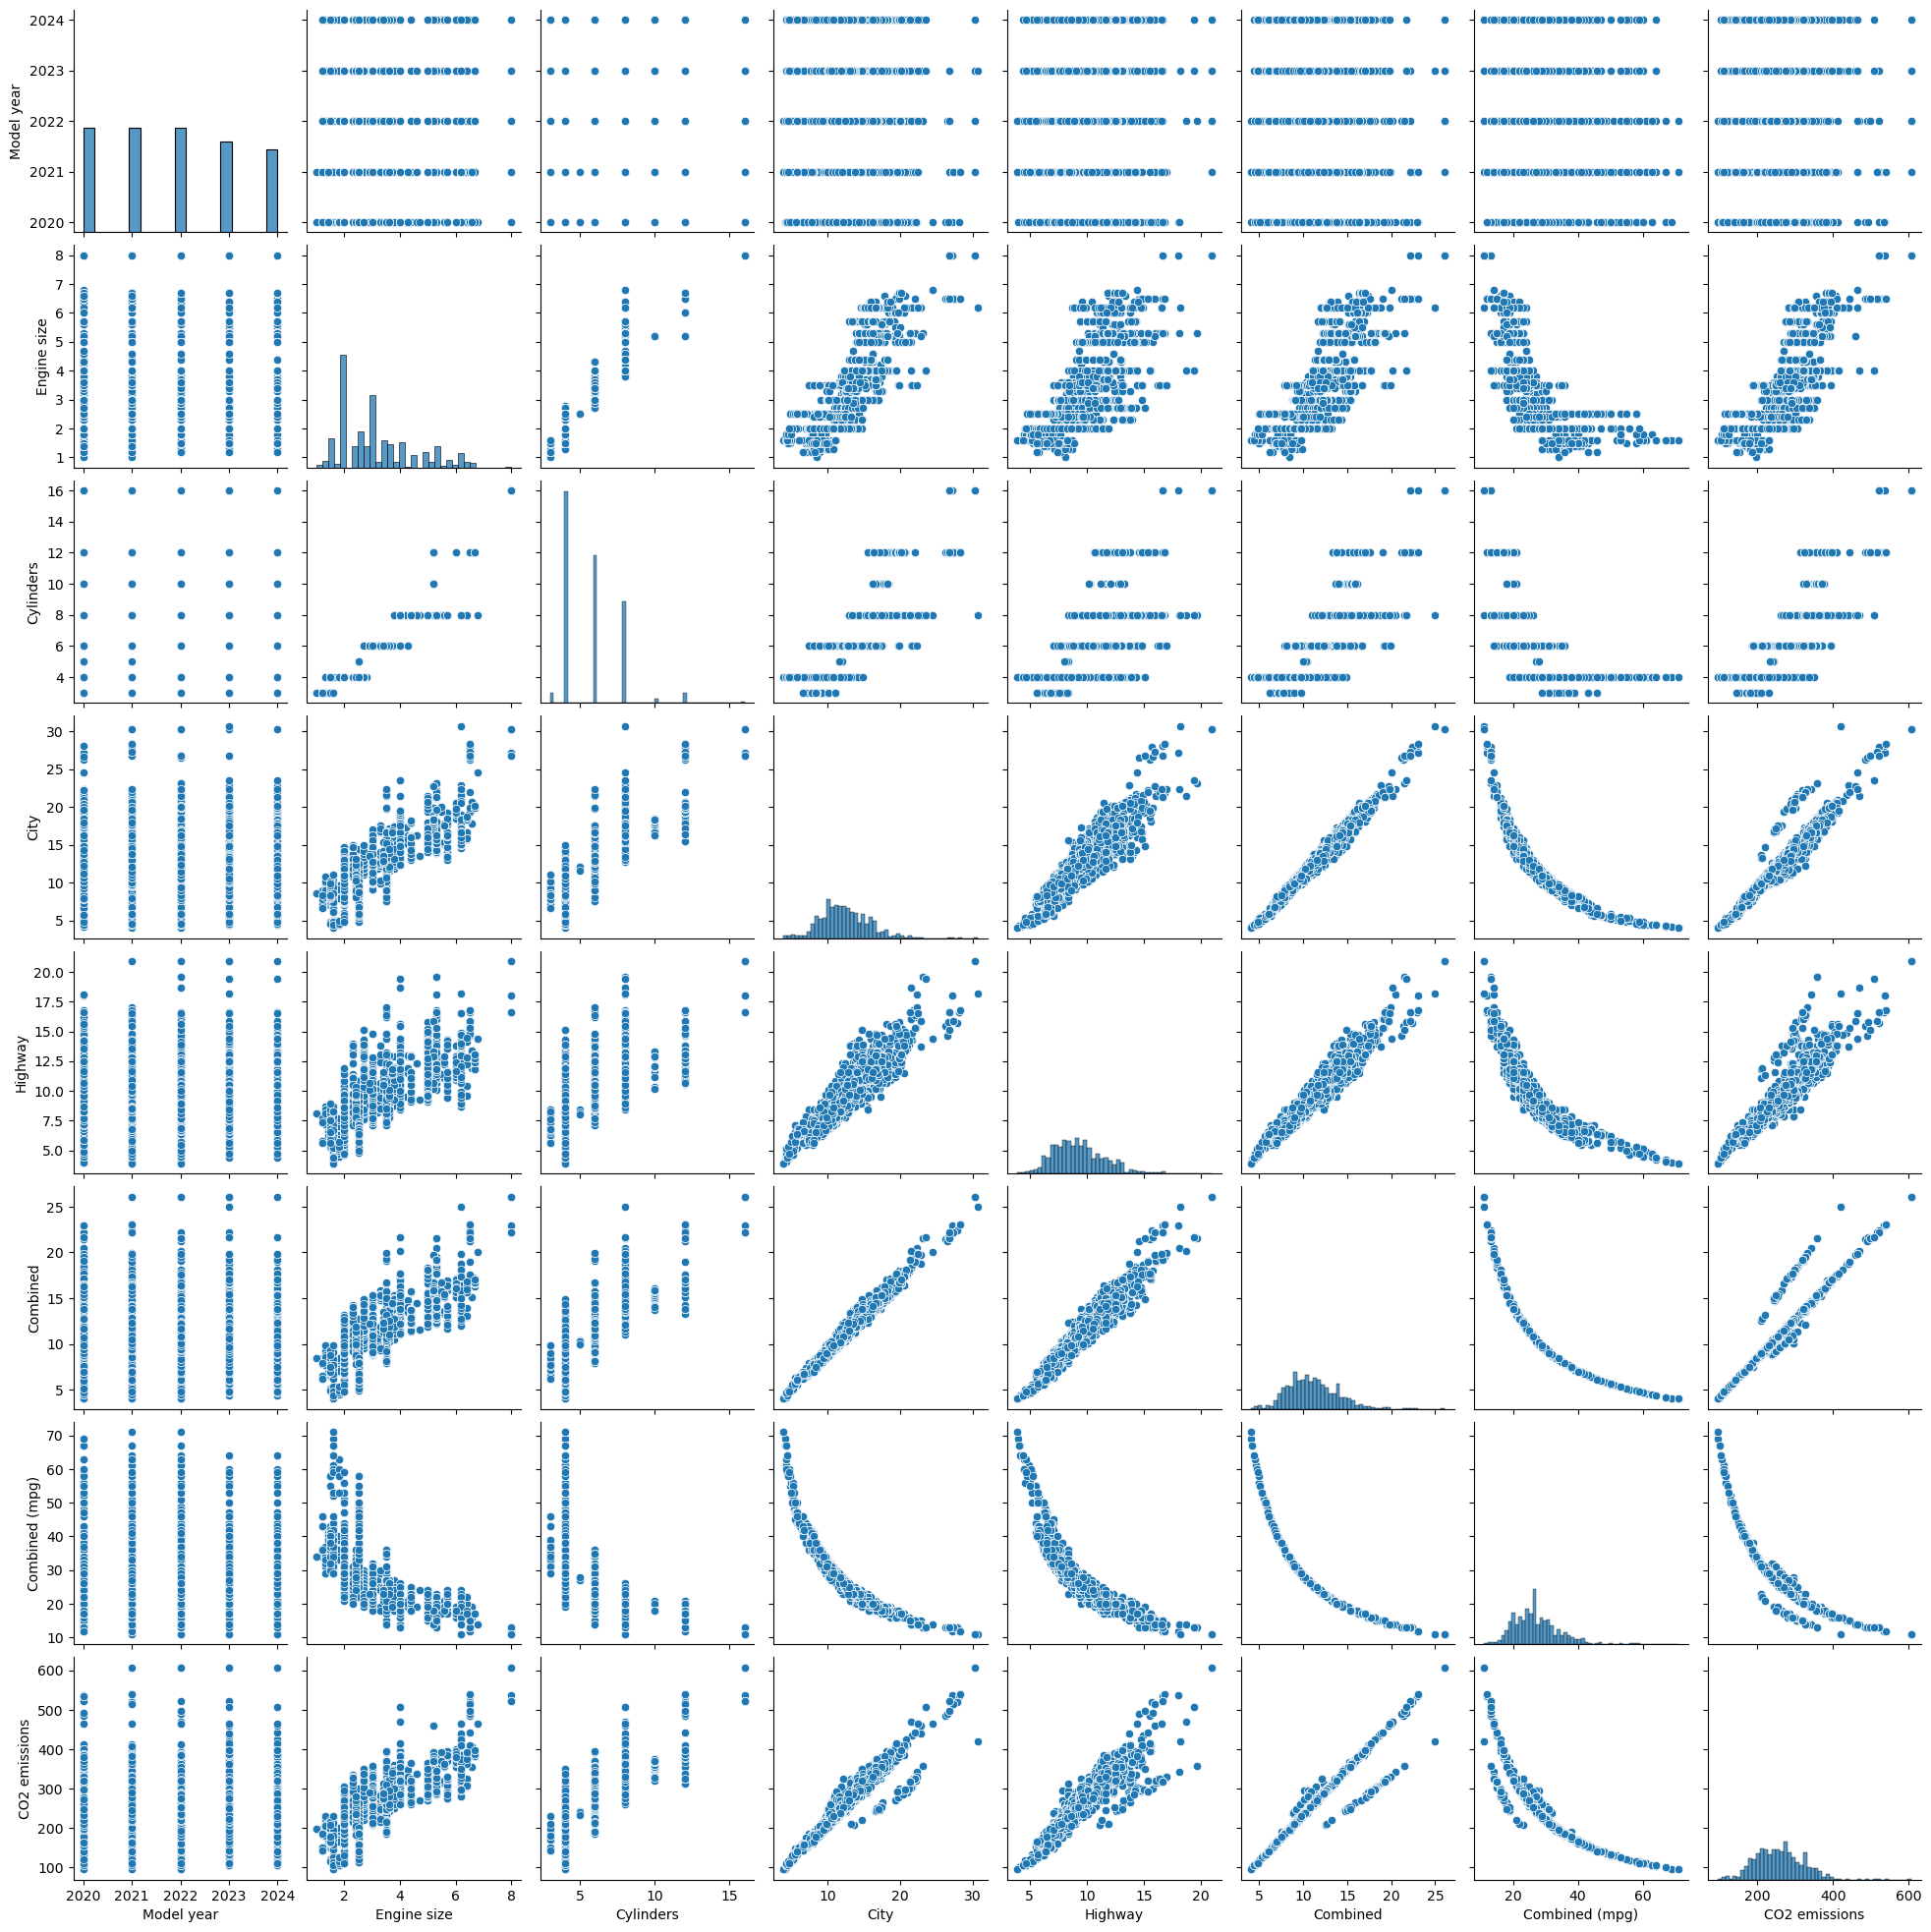

In [6]:
# GRADED CELL: Exercise 2

### START CODE HERE ###

# identify the numeric (independent) feature
numeric_features = df.select_dtypes(include=np.number).columns.tolist() 

plt.figure() 

axes = sns.pairplot(df[numeric_features])
    
### END CODE HERE ###

plt.show()

Remember that "Combined" and "Combined (mpg)" refer to the combined fuel consumption (55% city, 45% highway).

<a id="ex3"></a>

#### Exercise 3: Correlation matrix
You can see some quite strong correlations between variables from the pairplot, but it is hard to see which one is the best. Calculate the correlations to numerically evaluate which of the features might be the best to use.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the `.corr()` method on the dataframe to calculate correlations between the features.</li>
            <ul>
                <li>Make sure you select only the numerical columns.</li>
            </ul>
        </ol>
</div>

In [7]:
# GRADED CELL: Exercise 3

### START CODE HERE ###

correlation_matrix = df[numeric_features].corr()
    
### END CODE HERE ###

correlation_matrix

,Model year,Engine size,Cylinders,City,Highway,Combined,Combined (mpg),CO2 emissions
Model year,1.000000,-0.018811,-0.025161,-0.005381,0.037504,0.009871,-0.004164,0.016861
Engine size,-0.018811,1.000000,0.919458,0.828643,0.734967,0.810211,-0.701576,0.813010
Cylinders,-0.025161,0.919458,1.000000,0.835519,0.724491,0.811081,-0.691565,0.822607
City,-0.005381,0.828643,0.835519,1.000000,0.921315,0.990335,-0.910812,0.962699
Highway,0.037504,0.734967,0.724491,0.921315,1.000000,0.966060,-0.879067,0.931323
Combined,0.009871,0.810211,0.811081,0.990335,0.966060,1.000000,-0.916312,0.969235
Combined (mpg),-0.004164,-0.701576,-0.691565,-0.910812,-0.879067,-0.916312,1.000000,-0.914270
CO2 emissions,0.016861,0.813010,0.822607,0.962699,0.931323,0.969235,-0.914270,1.000000


**Reflect:** 
- Which variables are more correlated to CO₂ emissions?
- If you had to choose only one variable to use and predict the CO₂ emissions of the car, which one would it be?

<a id="fitting-a-simple-linear-regression"></a>
### Training a Simple Linear Regression

Since most of the time the cars will be used in the city, you decide to use the "City" variable for the regression, as it has one of the highest correlations (0.96). Although "Combined" shows a stronger linear relationship with a correlation of 0.97, it’s not as relevant since the cars won’t primarily be used on the highway.

<a id="ex4"></a>

#### Exercise 4: Simple Linear Regression
You are ready to train your linear regression! Use the `City` variable as the independent variable, and `CO₂ emissions` as the dependent one.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Prepare the dependent and independent variables.</li>
            <ul>
                <li>Prepare the independent variables: get the "City" column, and add the constant term.</li>
                <li>Get the "CO2 emissions" column, and save it in a variable.</li>
            </ul>
            <li>Create the model and fit it.</li>
            <li>Print the model summary.</li>
        </ol>
</div>

In [8]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# Prepare predictors. Remember to add a constant term to the predictor
X_simple = sm.add_constant(df["City"])
# Select the dependent variable
Y_simple = df["CO2 emissions"]

# Build and fit the model
model_simple = sm.OLS(Y_simple, X_simple)
results_simple = model_simple.fit()

# Print the results summary
print(results_simple.summary())

### END CODE HERE ###

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 5.731e+04
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:47:11   Log-Likelihood:                -19341.
No. Observations:                4529   AIC:                         3.869e+04
Df Residuals:                    4527   BIC:                         3.870e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2213      0.963     37.609      0.0

**Reflect**:
- Look at the R-squared value. Do you think you were able to fit a good model?
- Look at the coefficients. Based on the hypothesis test results, is the "City" variable statistically significant?


**What the model says**

Equation (with one predictor):

`CO₂ = 36.221 + 17.785 × City`


If City is a 0/1 indicator (e.g., 1 = city, 0 = not city), then being in a city is associated with ~17.8 more CO₂ units on average vs. not being in a city.

- Predicted averages: non-city ≈ 36.2; city ≈ 54.0.

- R-squared = 0.927 (Adj. 0.927): The single variable City explains about 93% of the variance in CO₂. For a simple model, that’s extremely high. It suggests a very strong association—but also raises the question of whether City is standing in for many other factors (possible omitted-variable issues).

- Overall model test (F = 5.73e+04, p≈0): The model as a whole is highly significant.

- Coefficient for City (17.785, SE 0.074, t = 239.39, p<0.001): Statistically significant with a very tight 95% CI [17.639, 17.930] that does not include 0. So, yes—the City variable is statistically significant.

<a id="step-5"></a>

## Step 5: Modelling the CO₂ emissions (multiple variables)

The simple linear regression performed well, but you can improve the model by adding other features. This will provide a more comprehensive understanding of how different variables interact, leading to more reliable results to select the best car from your list of options.

<a id="categorical-variables"></a>

### Categorical variables

<a id="ex5"></a>

#### Exercise 5: Encoding categorical variables

The "Fuel type" categorical variable seems like it could be useful. Use it to create dummy variables in the next exercise.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Specify the feature names of the two predictors: "City" and "Fuel type".</li>
            <li>Add the dummy variables for "Fuel type". Assign it to <code>fuel_type_dummies</code></li>
        </ol>
</div>

In [9]:
# GRADED CELL: Exercise 5

### START CODE HERE ###

# specify the predictors
predictors = ["City", "Fuel type"]

# create the dummy variables. 
fuel_type_dummies = pd.get_dummies(df[predictors], columns=["Fuel type"], drop_first=True, dtype=int)

### END CODE HERE ###

fuel_type_dummies.head()

,City,Fuel type_E,Fuel type_X,Fuel type_Z
0,9.9,0,0,1
1,12.3,0,0,1
2,12.2,0,0,1
3,9.1,0,0,1
4,11.1,0,0,1


<a id="training-the-model"></a>

### Training the model

<a id="ex6"></a>

#### Exercise 6: Create and fit a multiple linear regression

Now that you have all your features ready, it is time to create and fit the multiple linear regression model.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Prepare the predictor and the response variables </li>
            <ul>
                <li>Prepare the predictors: Add a constant term to <code>fuel_type_dummies</code>. Assign the result to <code>X_multi</code></li>
                <li>Get the "CO2 emissions" column, and save it in the <code>Y_multi</code> variable</li>
            </ul>
            <li>Create the model in <code>model_multi</code></li>
            <li>Train/fit the model in <code>results_multi</code></li>
            <li>Print the model summary</li>
        </ol>
</div>

In [10]:
# GRADED CELL: Exercise 6

### START CODE HERE ###

# now add the constant term
X_multi = sm.add_constant(fuel_type_dummies)

# Select the dependent variable
Y_multi = df["CO2 emissions"]

# Build and fit the model
model_multi = sm.OLS(Y_multi, X_multi)
results_multi = model_multi.fit()

# Print the model summary
print(results_multi.summary())

### END CODE HERE ###

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 5.217e+04
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:47:11   Log-Likelihood:                -16537.
No. Observations:                4529   AIC:                         3.308e+04
Df Residuals:                    4524   BIC:                         3.312e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.3992      1.003     55.233      

<a id="step-56"></a>

## Step 6: Predicting CO₂ emissions for new car models

Now that you have a model you are satisfied with, you will use it to predict the values of CO₂ emissions of the cars in the shortlist. 

The below exercise is already implemented for you. You will load the test data and process it and then you will use your latest model to predict the CO₂ emissions for each of the cars.

In [11]:
# load the test data
test_df = pd.read_csv("data/test_cars.csv")

# prepare the predictors for the first model
predictors = ["City", "Fuel type"]
# create the dummy variables for "Fuel type"
fuel_type_dummies_test = pd.get_dummies(test_df[predictors], columns=["Fuel type"], drop_first=True, dtype=int)
# if not all fuel types are present in the test data, add the missing columns
fuel_type_dummies_test = fuel_type_dummies_test.reindex(
    columns=fuel_type_dummies.columns, fill_value=0)

# get the predictor columns from X_multi.
X_test_multi = sm.add_constant(fuel_type_dummies_test)

# Predict the CO2 emissions using the second model
predictions_test_multi = results_multi.predict(X_test_multi)

Now that you have calculated the predictions for the four shortlisted cars, you just need to print out the output in an understandable way.

In [12]:
print("\nPredictions using the selected model:")
for i in range(len(predictions_test_multi)):
    print(test_df["Model year"][i], test_df["Make"][i], test_df["Model"][i], ":", predictions_test_multi[i])


Predictions using the selected model:
2023 Kia Forte : 213.25202144513065
2024 Nissan Sentra : 197.8517503175413
2023 Honda Accord : 161.85361655680123
2024 Genesis G70 : 241.67789789377835


Based on your predictions, which of these models would you suggest to the agency?

